In [1]:
import tensorflow as tf
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train

2022-08-04 12:32:32.011941: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-04 12:32:32.011966: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


170498071/170498071 [==============================] - 988s 6us/step


array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [4]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [10]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Flatten, BatchNormalization, Dropout, Activation
from keras.layers import Conv2D, AveragePooling2D
from keras import Sequential

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline

In [3]:
batch_size = 32  # The default batch size of keras.
num_classes = 10  # Number of class for the dataset
epochs = 100
data_augmentation = False

/home/tuandinh/Desktop/AI and Machine Learning/Deep Learninig/tuanenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/tuandinh/Desktop/AI and Machine Learning/Deep Learninig/tuanenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


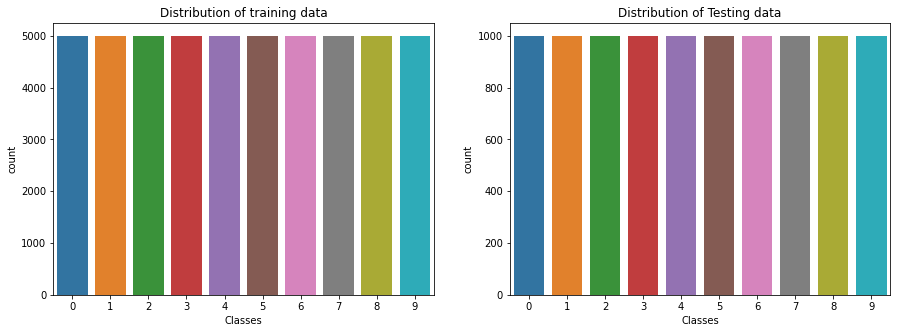

In [5]:
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
plt.show()

In [9]:
# Normalize the data. Before we need to connvert data type to float for computation.
from tensorflow import keras
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [12]:
x_train.shape[1:]

(32, 32, 3)

In [13]:
from keras.layers import MaxPooling2D
#define the convnet
model = Sequential([
    # CONV => RELU => CONV => RELU => POOL => DROPOUT
    Conv2D(32,(3,3), padding='same', input_shape=x_train.shape[1:]),
    Activation('relu'),
    Conv2D(32,(3,3)),
    Activation(tf.nn.relu),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(epsilon=0.01),
    Dropout(0.2),
    # CONV => RELU => CONV => RELU => POOL => DROPOUT
    Conv2D(64, (3, 3), padding='same'),
    Activation(tf.nn.relu),
    Conv2D(64,(3,3)),
    Activation(tf.nn.relu),
    AveragePooling2D(pool_size=(2,2)),
    BatchNormalization(epsilon=0.02),
    Dropout(0.25),
    # FLATTERN => DENSE => RELU => DROPOUT
    Flatten(),
    Dense(512),
    Activation(tf.nn.relu),
    Dropout(0.3),
    Dense(num_classes),
    Activation(tf.nn.softmax),
])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 15, 15, 32)       128       
 hNormalization)                                      

## **Trainning Model**

In [15]:
optimize = keras.optimizers.RMSprop(learning_rate=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy',
            optimizer=optimize,
            metrics=['accuracy'])

In [ ]:
history = None  # For recording the history of trainning process.
if not data_augmentation: # True
    print("not data augmentation")
    history = model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                validation_data=(x_test, y_test),
                shuffle=True)
else:
    print('Using real-time data augmentation.')
    # Điều này sẽ thực hiện xử lý trước và tăng dữ liệu thời gian thực:
    # Generate batches of tensor image data with real-time data augmentation.
    # Tạo hàng loạt dữ liệu hình ảnh tensor với tăng dữ liệu thời gian thực.
    datagen = ImageDataGenerator(
        featurewise_center=False, # set input mean to 0 over the datasets
        samplewise_center=False, # set each samples mean to 0
        featurewise_std_normalization=False, # divide inputs by std of the datasets
        samplewise_std_normalization=False, # divide each input by its std
        zca_epsilon=1e-6,
        zca_whitening=False, #apply ZCA whitening
        rotation_range=0,
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0,
        interpolation_order=1,
        dtype=None
    )
    